
# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET
# Solution By: Sayantan Chakraborty
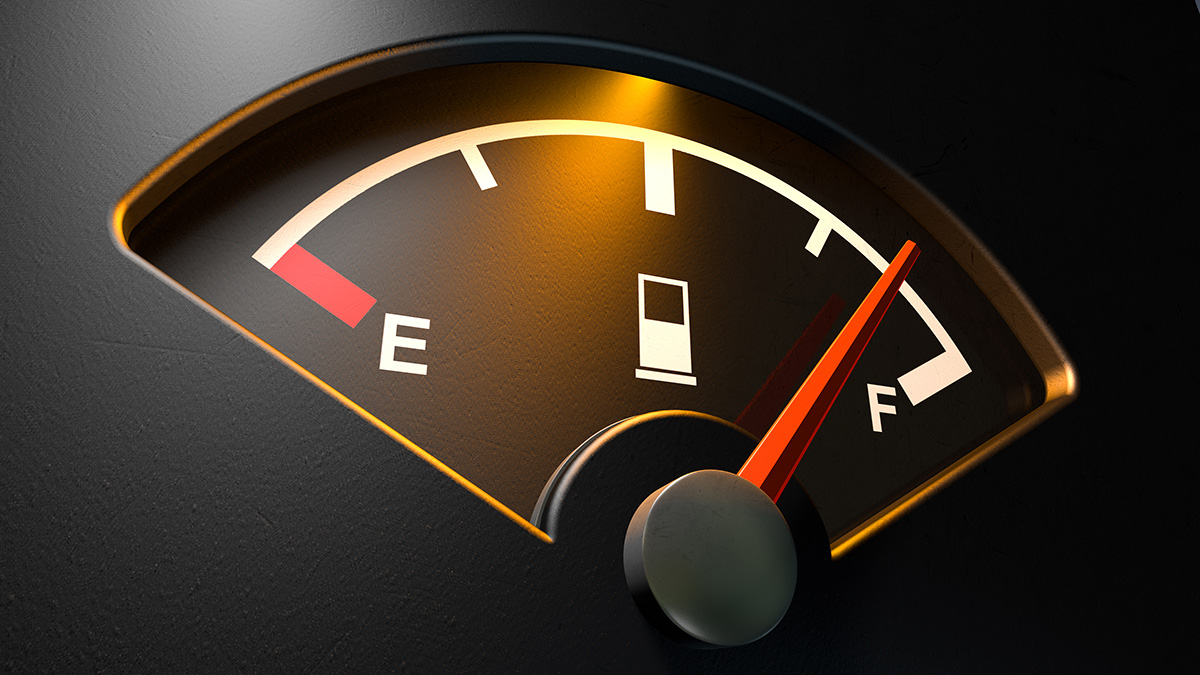



# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

# STEP #1: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #2: IMPORT DATASET

In [ ]:
fueleconomy_df = pd.read_csv('FuelEconomy.csv')

In [ ]:
fueleconomy_df.head(100)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
5,175.838106,24.173571
6,271.441608,17.163583
7,294.425916,17.274218
8,126.211008,28.718210
9,163.350335,28.289516


In [ ]:
fueleconomy_df.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [ ]:
fueleconomy_df.tail(5)

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [ ]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [ ]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Horse Power           100 non-null float64
Fuel Economy (MPG)    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


# STEP#3: VISUALIZE DATASET

In [ ]:
fueleconomy_df.head(4)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546


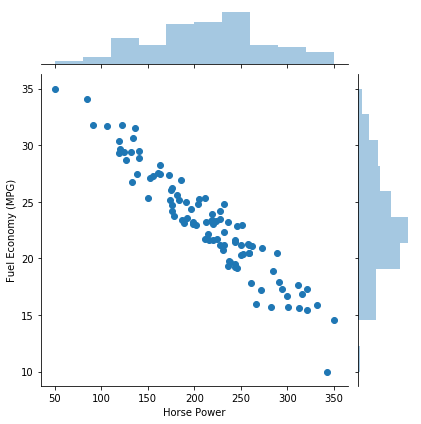

In [ ]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = fueleconomy_df)

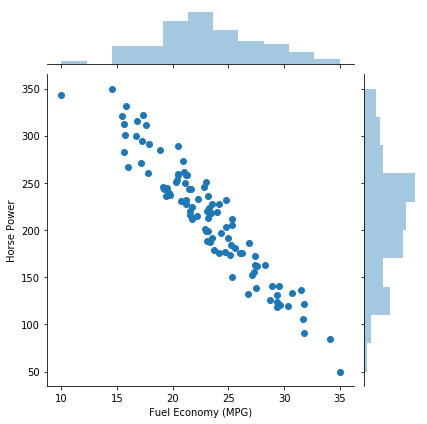

In [ ]:
sns.jointplot(x = 'Fuel Economy (MPG)', y = 'Horse Power', data = fueleconomy_df)

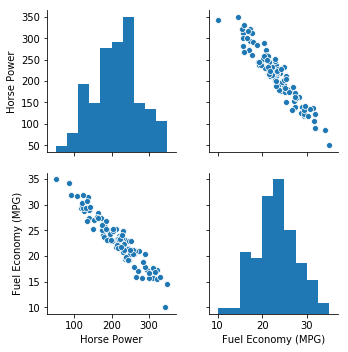

In [ ]:
sns.pairplot(fueleconomy_df)

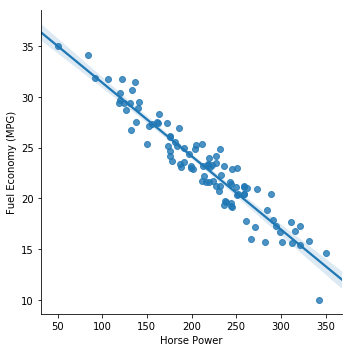

In [ ]:
sns.lmplot(x = 'Horse Power', y =  'Fuel Economy (MPG)', data = fueleconomy_df)

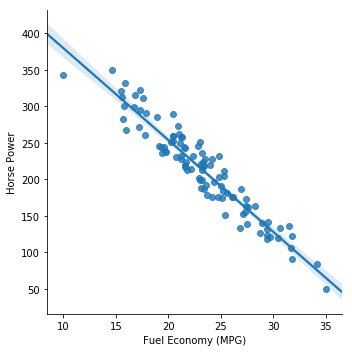

In [ ]:
sns.lmplot(x = 'Fuel Economy (MPG)', y =  'Horse Power', data = fueleconomy_df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [ ]:
X = fueleconomy_df[['Horse Power']]

In [ ]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [ ]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
5,175.838106
6,271.441608
7,294.425916
8,126.211008
9,163.350335


In [ ]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
5     24.173571
6     17.163583
7     17.274218
8     28.718210
9     28.289516
10    17.300628
11    29.678637
12    27.294930
13    23.556729
14    25.341892
15    20.467374
16    23.185280
17    24.989630
18    29.393330
19    31.497429
20    23.204745
21    22.313051
22    31.796612
23    28.882081
24    21.623369
25    23.719583
26    21.167343
27    24.829824
28    31.806706
29    30.392613
        ...    
70    23.307192
71    16.693369
72    26.057085
73    21.050399
74    21.261778
75    21.582643
76    22.183092
77    15.441711
78    20.470676
79    19.367337
80    23.172223
81    21.139429
82    21.595626
83    21.216359
84    21.701202
85    19.674094
86    15.837968
87    31.722566
88    24.826199
89    10.000000
90    19.723462
91    25.286954
92    24.181109
93    29.397567
94    17.802706
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG)

In [ ]:
X.shape

(100, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(70, 1)

In [ ]:
X_test.shape

(30, 1)

# STEP#5: TRAIN THE MODEL

In [ ]:
X_train.shape

(70, 1)

In [ ]:
X_test.shape

(30, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
print('Linear Model Coeff (m):', regressor.coef_)
print('Linear Model Coeff (b):', regressor.intercept_)

Linear Model Coeff (m): [-0.07045156]
Linear Model Coeff (b): 38.041238126646476


# STEP#6: TEST THE MODEL

In [ ]:
y_predict = regressor.predict(X_test)
y_predict

array([25.06948271, 21.80478409, 26.57098227, 25.2847206 , 24.93442765,
       28.77389147, 28.61319538, 29.44331897, 32.08300974, 20.24852979,
       20.43652196, 22.80389082, 19.59334975, 20.32799069, 25.61875723,
       28.14756327, 20.86957037, 22.23598982, 21.98719543, 27.30809466,
       22.64092695, 23.1245931 , 21.38194995, 24.53463137, 23.59537241,
       17.29847446, 27.09198378, 28.11040081, 29.14947632, 22.02195475])

In [ ]:
y_test

99    25.196097
60    20.715722
95    27.418661
65    25.575084
43    26.897067
93    29.397567
49    30.674803
22    31.796612
67    34.114025
39    20.407571
81    21.139429
82    21.595626
73    21.050399
56    22.965773
1     24.695934
23    28.882081
42    21.442703
84    21.701202
36    23.488811
38    27.094411
4     23.426739
14    25.341892
79    19.367337
13    23.556729
91    25.286954
7     17.274218
12    27.294930
98    29.515593
8     28.718210
92    24.181109
Name: Fuel Economy (MPG), dtype: float64

Text(0.5,1,'HP vs. MPG (Training Set)')

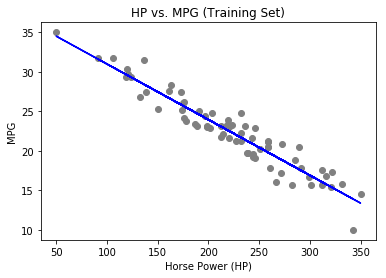

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Training Set)')

Text(0.5,1,'HP vs. MPG (Testing Set)')

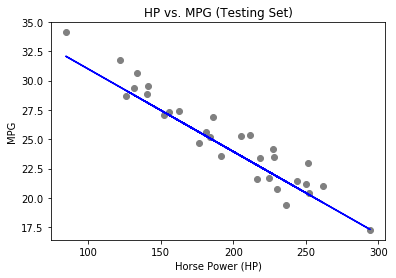

In [ ]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Testing Set)')

In [ ]:
HP = 500
# MPG?

In [ ]:
MPG = regressor.predict(HP)
MPG

array([2.81546053])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION